In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

plt.style.use("ggplot")

## Problem Set 2 (Revised) - Quant Macro
### Weimin Zhou
### Due: 4, Oct, 2018

----
### Revised Part:

After discussing during class, I'm going to calculate the Labor Share as following:

- The baseline is the share of labor compensation of employees, and it does not include self-employed income.
- Adjustment 1 adds all of mixed-income1 to total labor compensation.
- Adjustment 2 adds mixed-income to total labor compensation in the same proportion as the rest of the economy. (Although adjustment 2 is considered the best measure, only Japan reports mixed-income.)

----
#### Questions: 
### 1. Construct the accounting LS for the corporate sector for the United States (1947-2017).

### 2. Redo the two previous items for your country of origin. If data are missing for your country, then do it for Japan and the UK.

Describe in detail what you do to construct each of your accounting LS and discuss your findings. What are the secular properties of the LS that you find in each of the items above?

In [3]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/zhouweimin/PycharmProjects/QuantEcon


In [4]:
import pandas as pd
# if download without operating anything, use: skiprows and skipcolumns options. 
US_data = pd.read_excel('US.xls',sep = ',',index_col=0)
US_data = US_data.transpose()
US_data.columns

Index(['        National income', 'Compensation of employees',
       '    Wages and salaries', '        Government', '        Other',
       '    Supplements to wages and salaries',
       '        Employer contributions for employee pension and insurance funds1',
       '        Employer contributions for government social insurance',
       'Proprietors' income with IVA and CCAdj', '    Farm', '    Nonfarm',
       'Rental income of persons with CCAdj',
       'Corporate profits with IVA and CCAdj', '    Taxes on corporate income',
       '    Profits after tax with IVA and CCAdj', '        Net dividends',
       '        Undistributed profits with IVA and CCAdj',
       'Net interest and miscellaneous payments',
       'Taxes on production and imports', 'Less: Subsidies2',
       'Business current transfer payments (net)', '    To persons (net)',
       '    To government (net)', '    To the rest of the world (net)',
       'Current surplus of government enterprises2',
       'Adde

## 1. Construct the nationwide accounting LS for the United States (1947-2017)
## Labor Share - Straight Simple Version

By downloading Table 1.12: National Income by Type of Income from year 1947 to 2017. And for a more fast speed data manipulation, I use MS Excel to delete columns and rows I don't need, if for purely manipulating in Python, just use pandas packages with options 'skiprows' and 'skipcols' in command [read_excel]

I first distinguish which is sourcing from labor and capital, specifically: wage times effective working hours are the labor part, indexed as $w*H$ and rental rates times capital stock are the capital part of contribution, indexed as $r*K$. 

"Depending on the choice of numerator and denominator, one can end up
with a variety of “shares” that need not tell the same story." 

By "What Do We Know About the Labor Share and the Profit Share?". Oliver Giovannoni(2014), page 8. 

Thus this simple version of labor shares is described following:

As discussed during class, there's one sector named 'Proprietors' income with IVA and CCAdj' (PI hereafter) is regarded as self-employed sector, which needs split labor and capital.

*Nationwide Labor Share*: I call such labor share as Nationwide Labor share consists of wages, benefits and an estimate of the labor component of proprietors’ income. Since this measure contains also sel-employeed sector, farm and nonbusinees sectors.

*Naive Labor Share*: Labor share for the corporate sector, which indicates there's no accounting for farm and nonbusiness sector. 

The general formula of computing labor share is defined by: 

$$ \alpha^{j}_{i,t} = \frac{W_t}{Y_t}$$

where $j$ is the type of labor share (nationwide or naive); $i$ indicates the country (US or UK); $W_t$ is the sum of labor income at time t; ${Y_t}$ is the measure of total income. 


For Total Income $Y_t$, sum up all of which:

### Labor: 
- 'Compensation of employees' 

### Need to separate: 
- 'Proprietors' income with IVA and CCAdj'

To separate PI, we use the following strategy:

1. compute $\frac{wH}{Y-PI}=\theta$ where $\theta$ is the wage of PI

2. then: $(rK)_{PI} = (1-\theta)PI$ as capital part, and $(wH)_{PI}=\theta PI$

To exclude PI, compute Naive Labor Share by:
$$ \frac{CE}{Y}$$

### Capital: 
- 'Rental income of persons with CCAdj'

- 'Corporate profits with IVA and CCAdj'

- 'Net interest and miscellaneous payments'

#### Taxes need to adjust: 

- 'Taxes on production and imports'

- 'Less:Subsidies2'


In [5]:
CE   = US_data[['Compensation of employees']] 
PI   = US_data[['Proprietors\' income with IVA and CCAdj']]
RI   = US_data[['Rental income of persons with CCAdj']]
CP   = US_data[['Corporate profits with IVA and CCAdj']]
NIMP = US_data[['Net interest and miscellaneous payments']]
Taxes  = US_data[['Taxes on production and imports']]
Lsubsidies = US_data[['Less: Subsidies2']]
NI = US_data[['        National income']]

CE = np.asarray(CE, float)
PI = np.asarray(PI, float)
RI = np.asarray(RI, float)
CP = np.asarray(CP, float)
NIMP = np.asarray(NIMP, float)
Taxes = np.asarray(Taxes, float)
Lsubsidies = np.asarray(Lsubsidies, float)
NI = np.asarray(NI, float)

In [6]:
'''
Depreciation obtained by comsuption of fixed capital from Table 1.14 of NIPA BEA

Using corporate sector 
'''

frame1 = pd.read_excel('depreciation.xls',sep = ',',index_col=0, sheetname='Sheet2')

frame1 = frame1.transpose()
frame1.columns

delta = frame1[['Consumption of fixed capital']]

len(delta)

71

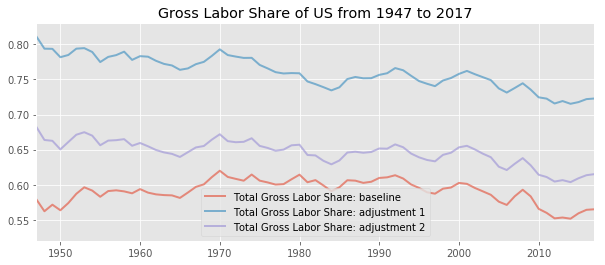

In [10]:
Y1 = CE + PI + RI + CP + NIMP + Taxes + Lsubsidies + delta
CI = RI + CP + NIMP + delta

# Gross labor share baseline:
LS_naive = CE / Y1 

# GLS adjustment 1:
LS_naive1 = 1 - CI / Y1

# GLS adjustment 2:
theta = CE/(Y1-PI)
LS_naive2 = (CE+theta*PI)/Y1 

# Labor share with tax adjustment
tau = (Taxes+Lsubsidies)/Y1

LS_tau = LS_naive * (1/(1-tau)) 
LS_tau1 = LS_naive1 * (1/(1-tau)) 
LS_tau2 = LS_naive2 * (1/(1-tau)) 

Year = np.linspace(1947,2017,num=71)
Year = np.asarray(Year)

fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.52,0.83)
plt.xlim(1947,2017)

ax.plot(Year, LS_naive, linewidth=2, alpha=0.6, label='Total Gross Labor Share: baseline')
ax.plot(Year, LS_naive1, linewidth=2, alpha=0.6, label='Total Gross Labor Share: adjustment 1')
ax.plot(Year, LS_naive2, linewidth=2, alpha=0.6, label='Total Gross Labor Share: adjustment 2')

plt.title('Gross Labor Share of US from 1947 to 2017')
ax.legend()
plt.show()

The following analysis should be addressed to Gross Labor Share, with 3 different measurements, baseline, adjustment 1 and 2 respectively. 

We can see a slightly decreasing, as discussed during class, which may be interpreted as Income Inequality or Technological Progressivity, or faster Growing of Capital Income. 

## Extended: Tax-Adjusted Labor Share

### Above is a gross aggregate approach to calculte the labor share. Hereafter, I propose a more completed way to compute based on our dataset. 

By the hint from "Capital Depreciation and Labor Shares Around the World: Measurement and Implications". Loukas and Brent (2014). Above practice effectively treats all taxes as capital income. Thus, A reasonable alternative treatment is to make a tax-adjusted labor share, defined by:

$$ \tilde s^{j}_{L,i,t}=\frac{Compensation + \tilde s^{j}_{L,i,t} \times Taxes \quad on\quad Production}{Value\quad Added}$$

$$ \tilde s^{j}_{L,i,t}=s^{j}_{L,i,t} \frac{1}{1-\tau^{j}_{i,t}}$$

*Labor Part*: 
- Compensation of employees

*Mixed Part*: 

- Proprietor's income with IVA and CCAdj
- 

*Capital Part*:
- Rental income of persons with CCAdj
- Corporate profits with IVA and CCAdj
- Net interest and miscellaneous payments

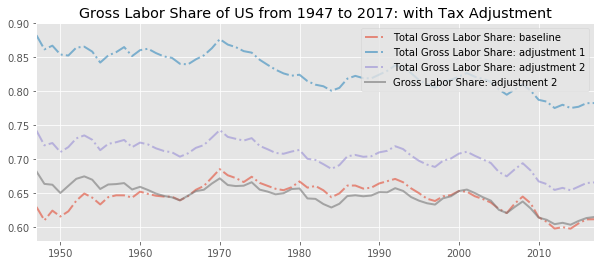

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.58,0.9)
plt.xlim(1947,2017)
ax.plot(Year, LS_tau, '-.', linewidth=2, alpha=0.6, label='Total Gross Labor Share: baseline')
ax.plot(Year, LS_tau1, '-.',linewidth=2, alpha=0.6, label='Total Gross Labor Share: adjustment 1')
ax.plot(Year, LS_tau2, '-.',linewidth=2, alpha=0.6, label='Total Gross Labor Share: adjustment 2')
ax.plot(Year, LS_naive2, linewidth=2, alpha=0.6, label='Gross Labor Share: adjustment 2 ')
plt.title('Gross Labor Share of US from 1947 to 2017: with Tax Adjustment')
ax.legend()
plt.show()


## 2. Construct the accounting LS for the corporate sector for the United States (1947-2017).

From [Table 1.13. National Income by Sector, Legal Form of Organization, and Type of Income](https://apps.bea.gov/iTable/iTable.cfm?reqid=19&step=2#reqid=19&step=2&isuri=1&1921=survey)

In [13]:
import pandas as pd
# if download without operating anything, use: skiprows and skipcolumns options. 
US_data0 = pd.read_excel('US2.xls',sep = ',',index_col=0, sheetname='Sheet1')
US_data0.index

Index(['Corporate business', 'Compensation of employees', 'Wages and salaries',
       'Supplements to wages and salaries',
       'Corporate profits with IVA and CCAdj',
       'Net interest and miscellaneous payments',
       'Taxes on production and imports less subsidies plus business current transfer payments'],
      dtype='object')

In [14]:
US_data0 = US_data0.transpose()
US_data0.columns


Index(['Corporate business', 'Compensation of employees', 'Wages and salaries',
       'Supplements to wages and salaries',
       'Corporate profits with IVA and CCAdj',
       'Net interest and miscellaneous payments',
       'Taxes on production and imports less subsidies plus business current transfer payments'],
      dtype='object')

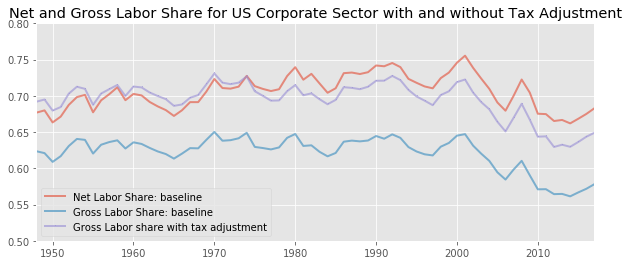

In [17]:
Y0   = US_data0[['Corporate business']] 
CE0   = US_data0[['Compensation of employees']] 
Taxes0  = US_data0[['Taxes on production and imports less subsidies plus business current transfer payments']]

CE0 = np.asarray(CE0, float)
Y0 = np.asarray(Y0, float)
Taxes0 = np.asarray(Taxes0, float)

# Net Labor Share: baseline (no depreciation), since there's no need for adjustment:
LS_naive00 = CE0 / Y0

# Gross Labor Share: baseline
LS_naive11 = CE0 / (Y0+delta[1:])
# Gross Labor share with tax adjustment
tau0 = (Taxes0)/Y0
LS_naive22 = LS_naive11 * (1/(1-tau0)) 

Year = np.linspace(1948,2017,num=70)
Year = np.asarray(Year)

fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.5,0.8)
plt.xlim(1948,2017)
ax.plot(Year, LS_naive00, linewidth=2, alpha=0.6, label='Net Labor Share: baseline')
ax.plot(Year, LS_naive11, linewidth=2, alpha=0.6, label='Gross Labor Share: baseline')
ax.plot(Year, LS_naive22, '-,', linewidth=2, alpha=0.6, label='Gross Labor share with tax adjustment')
plt.title('Net and Gross Labor Share for US Corporate Sector with and without Tax Adjustment')
ax.legend()
plt.show()

### Comments:
I get a slightlyl decreasing gross labor share for nationwide data, and a more significant decling labor share for Corporate Sector. 
Whenever I change the dataset or change measure (baseline, adjustment 1 and 2), they are all not hump-shaped except Net Labor Share: baseline for Corporate Sector. 

In [25]:
'''
Another type of data manipulation: use Table1.17.5 as NBER working paper
'''
US_data00 = pd.read_excel('US_Table1_17_5.xls',sep = ',',index_col=0, sheetname='Sheet0')
US_data00.index


Index(['Production in the United States:', 'Gross domestic product (GDP)',
       'Gross domestic income (GDI)', '        Average of GDP and GDI1',
       'Net domestic product', '        Net domestic income2',
       'Production by labor and capital supplied by U.S. residents:',
       '        Gross national product', '        Gross national income',
       '        Net national product2', '        National income3',
       'Final expenditures by U.S. residents:',
       '        Gross domestic purchases',
       '        Final sales to domestic purchasers4',
       '        Final sales to private domestic purchasers5',
       'After-tax income received by the personal sector:',
       '        Disposable personal income'],
      dtype='object')

In [27]:
US_data00 = US_data00.transpose()
GDP   = US_data00[['Gross domestic product (GDP)']] 
NDP   = US_data00[['Net domestic product']] 

GDP = np.asarray(GDP, float)
NDP = np.asarray(NDP, float)

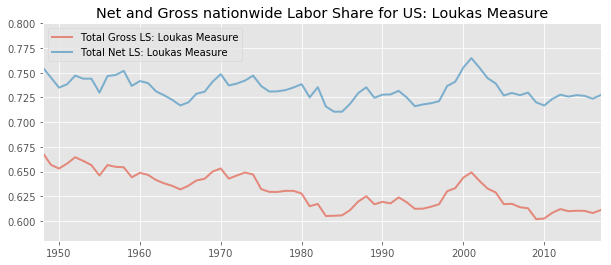

In [39]:
TotalGross_LS = (CE+PI)/GDP[18:]  # accounted depreciation
TotalNet_LS = (CE+PI)/NDP[18:]    # no depreciation 

Year0 = np.linspace(1947,2017,num=71)
Year0 = np.asarray(Year0)
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.58,0.8)
plt.xlim(1948,2017)
ax.plot(Year0, TotalGross_LS, linewidth=2, alpha=0.6, label='Total Gross LS: Loukas Measure')
ax.plot(Year0, TotalNet_LS, linewidth=2, alpha=0.6, label='Total Net LS: Loukas Measure')
plt.title('Net and Gross nationwide Labor Share for US: Loukas Measure')
ax.legend()
plt.show()

This measure makes LS of US more smooth but still has a drop after 2000. 


By NBER working paper [CAPITAL DEPRECIATION AND LABOR SHARES AROUND THE WORLD: MEASUREMENT AND IMPLICATIONS. Loukas Karabarbounis, 2014.](https://www.nber.org/papers/w20606). My total depreciation will be Gross Domestic Product (GDP) minus Net Domestic Product (NDP) (For US data, go to NIPA BEA Table1.17.5). And the four labor share measures are: 

- Total Net Labor Share: 

$$ TotalNet\_LS = \frac{(Total) Compensation of Employees}{Gross Domestic Product - Total Depreciation}$$

where as a comparison, I calculate Net Labor Share by using National Income: 
$$ Net\_LS = \frac{Compensation of Employees}{National Income} $$

- Total Gross Labor Share: 

$$ TotalGross\_LS = \frac{Total Compensation of Employees}{Gross Domestic Product}$$

- Corporate Sector Gross Labor Share: 

$$ CorporateGross\_LS = \frac{Corporate Compensation of Employees}{Corporate Gross Value Added}$$


- Corporate Net Labor Share:

$$ CorporateNet\_LS = \frac{Corporate Compensation of Employees}{Corporate Gross Value Added − Corporate Depreciation}$$

## Redo with UK

Since [Chinese Data on National Income](http://www.stats.gov.cn/tjsj/ndsj/2017/indexeh.htm) is only annually provincial available on pdf, which is very time-consuming to collect.

I use United Kindom Data, sourced from [Office for National Statistics (GB)](https://www.ons.gov.uk/economy/nationalaccounts/uksectoraccounts/datasets/unitedkingdomeconomicaccountsmainaggregates) instead.

Database: UK Economic Accounts: main aggregates - Table 1.6.3: Income and Capital accounts United Kingdom, ESA2010 Sector S.1 (pounds million)


In [43]:
UK_data = pd.read_excel('UK.xls',sep = ',',index_col=0,sheetname='Sheet1')
UK_data = UK_data.transpose()
UK_data.columns

Index(['Compensation of employees', 'Gross operating surplus of corporations',
       'Other income', 'Gross value added at factor cost',
       'Taxes on production less subsidies',
       'Statistical discrepancy (income)',
       'Gross domestic product at market prices'],
      dtype='object')

In [45]:
# UK_data = UK_data.transpose()
CE = UK_data[['Compensation of employees']]
GOSC = UK_data[['Gross operating surplus of corporations']]
OI = UK_data[['Other income']]
GVA = UK_data[['Gross value added at factor cost']]
TPL = UK_data[['Taxes on production less subsidies']]

CE = np.asarray(CE, float)
GOSC = np.asarray(GOSC, float)
OI = np.asarray(OI, float)
GVA = np.asarray(GVA, float)
TPL = np.asarray(TPL, float)

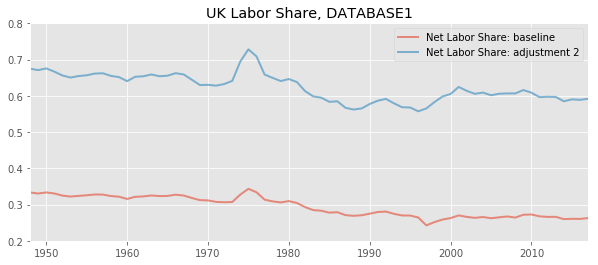

In [50]:
# Net Labor Share with baseline:
OI = np.nan_to_num(OI)
PI = OI + GVA
Y = CE + GOSC + PI + TPL
LS_naive = CE / Y

# Net Labor Share with adjustment 2
theta = CE / (Y - PI)
RK_PI = (1-theta)*PI
LS_national = ( CE + theta*PI ) / Y

Year = np.linspace(1948,2017,num=70)
Year = np.asarray(Year)
np.shape(Year)
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.2,0.8)
plt.xlim(1948,2017)
ax.plot(Year, LS_naive, linewidth=2, alpha=0.6, label='Net Labor Share: baseline')
ax.plot(Year, LS_national, linewidth=2, alpha=0.6, label='Net Labor Share: adjustment 2')
plt.title('UK Labor Share, DATABASE1')
ax.legend()
plt.show()

In [48]:
UK_data2 = pd.read_excel('UK1.xls',sep = ',',index_col=0,sheetname='Sheet1')
UK_data2 = UK_data2.transpose()
UK_data2.columns

Index(['Gross operating surplus', 'Gross mixed income',
       'Compensation of employees', 'Taxes on products',
       'Subsidies on products', 'Other subsidies on production',
       'Property income', 'Gross domestic product'],
      dtype='object')

In [49]:
CE2 = UK_data2[['Compensation of employees']]
GOS2 = UK_data2[['Gross operating surplus']]
GMI2 = UK_data2[['Gross mixed income']]
SOP2 = UK_data2[['Subsidies on products']]
TOP2 = UK_data2[['Taxes on products']]
OSOP2 = UK_data2[['Other subsidies on production']]
PI2 = UK_data2[['Property income']]
GDP = UK_data2[['Gross domestic product']]

CE2 = np.asarray(CE2, float)
GOS2 = np.asarray(GOS2, float)
GMI2 = np.asarray(GMI2, float)
SOP2 = np.asarray(SOP2, float)
TOP2 = np.asarray(TOP2, float)
OSOP2 = np.asarray(OSOP2, float)
PI2 = np.asarray(PI2, float)
GDP = np.asarray(GDP,float)

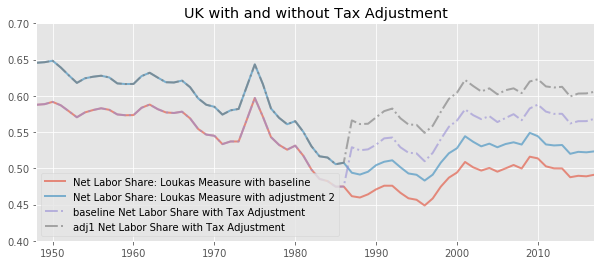

In [52]:
TOP2 = np.nan_to_num(TOP2)
OSOP2 = np.nan_to_num(OSOP2)
PI2 = np.nan_to_num(PI2)
SOP2 = np.nan_to_num(SOP2)

PI = GMI2
tau = TOP2 + OSOP2 + SOP2

# Net Labor Share: Loukas Measure with baseline
LS_naive3 = CE2 / GDP

# Net Labor Share: Loukas Measure with adjustment 2
theta1 = CE2 / (GDP - PI)
RK_PI = (1-theta1)*PI
LS_national3 = ( CE2 + theta1*PI ) / GDP

# Tax Adjustment:
tau0 = (TOP2+OSOP2+SOP2)/GDP

LS_naive4 = LS_naive3*(1/(1-tau0))
LS_national4 = LS_national3*(1/(1-tau0)) 

Year = np.linspace(1948,2017,num=70)
Year = np.asarray(Year)
np.shape(Year)
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.4,0.7)
plt.xlim(1948,2017)
ax.plot(Year, LS_naive3, linewidth=2, alpha=0.6, label='Net Labor Share: Loukas Measure with baseline')
ax.plot(Year, LS_national3, linewidth=2, alpha=0.6, label='Net Labor Share: Loukas Measure with adjustment 2')
ax.plot(Year, LS_naive4, '-.', linewidth=2, alpha=0.6, label='baseline Net Labor Share with Tax Adjustment')
ax.plot(Year, LS_national4, '-.', linewidth=2, alpha=0.6, label='adj1 Net Labor Share with Tax Adjustment')
plt.title('UK with and without Tax Adjustment')
ax.legend()
plt.show()

## Comments:

By looking at the UK data, there's no data for taxes, subsidies and property income from 1948 to 1987. (also checked [OECD stats](https://stats.oecd.org/Index.aspx?DatasetCode=IDD#)) Hence, for tax adjustment, labor shares remain the same before 1987. 

Comparing US and UK data, both Labor shares show a decline in the past 30 years, which corresponds to analysis in many papers. The interpretation about such a decline is linked to globalisation and technological progress, i.e. “robotisation”.[A detail blog about declining LS](http://bruegel.org/2017/04/the-decline-of-the-labour-share-of-income/)

And in practice not all types of income can easily be ascribed to either capital or labor, different measure of data, different denominator and nominator lead to a different labor share. 

Above process has been done very early, and consumption of fixed capital in UK data is at least missing in OECD stats, thus below I manipulate Japanese data for a deeper investigation instead.

In [53]:
JAPAN_data = pd.read_excel('JAPAN.xlsx',sep = ',',index_col=0)
JAPAN_data = JAPAN_data.transpose()
JAPAN_data.columns

Index([                                             nan,
                                                  'GDP',
                            'Compensation of employees',
       'Gross operating surplus and gross mixed income',
       'Taxes less subsidies on production and imports',
                                'Gross domestic income',
               'Gross national income at market prices',
                         'Consumption of fixed capital',
                 'Net national income at market prices'],
      dtype='object', name='Sorry, the query is too large to fit into the Excel cell. You will not be able to update your table with the .Stat Populator.')

In [54]:
GDPj = JAPAN_data[['GDP']]
CEj = JAPAN_data[['Compensation of employees']]
MIj = JAPAN_data[['Gross operating surplus and gross mixed income']]
Taxj = JAPAN_data[['Taxes less subsidies on production and imports']]
NIj = JAPAN_data[['Net national income at market prices']]
deltaj = JAPAN_data[['Consumption of fixed capital']]

GDPj = np.asarray(GDPj, float)
CEj = np.asarray(CEj, float)
MIj = np.asarray(MIj, float)
Taxj = np.asarray(Taxj, float)
NIj = np.asarray(NIj, float)
deltaj = np.asarray(deltaj, float)

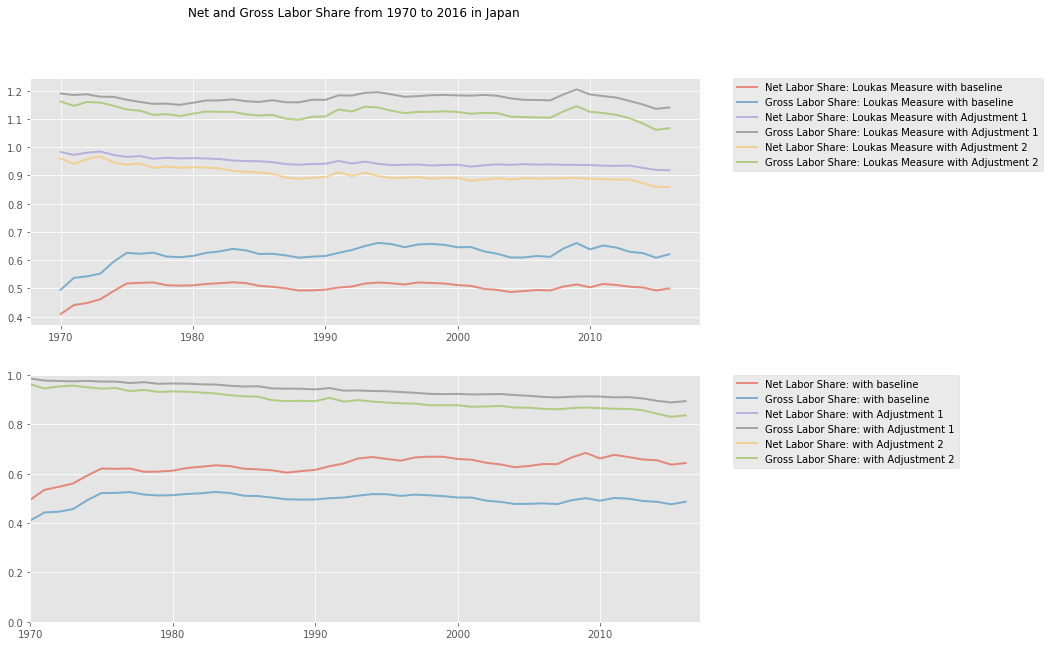

In [62]:

'''
Loukas Measure:  use GDP and Net Domestic Product (here, use Net National Income instead)
'''

## == Baseline == ##
# Net LS
LS0 = CEj/GDPj
# Gross LS 
LS1 = CEj/NIj

## == adjustment 1 == ##
# Net LS
LS00 = (CEj+MIj)/GDPj
# Gross LS 
LS11 = (CEj+MIj)/NIj

## == adjustment 2 == ##
# Net LS
theta000 = CEj/(GDPj-MIj)
LS000 = (CEj+theta000*MIj)/GDPj
# Gross LS 
LS111 = (CEj+theta000*MIj)/NIj

'''
Measure discussed in Class
'''
## == Baseline == ##

# Net LS
LS5 = CEj/(GDPj-deltaj)
# Gross LS 
LS55 = CEj/(NIj+deltaj)

## == adjustment 1 == ##
# Net LS
LS6 = (CEj+MIj)/(GDPj-deltaj)
# Gross LS 
LS66 = (CEj+MIj)/(NIj+deltaj)

## == adjustment 2 == ##
# Net LS
LS7 = (CEj+theta000*MIj)/(GDPj-deltaj)
# Gross LS 
LS77 = (CEj+theta000*MIj)/(NIj+deltaj)



Year = np.linspace(1970,2016,num=47)
Year = np.asarray(Year)
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(12,10))

ax1.plot(Year, LS0, linewidth=2, alpha=0.6, label='Net Labor Share: Loukas Measure with baseline')
ax1.plot(Year, LS1, linewidth=2, alpha=0.6, label='Gross Labor Share: Loukas Measure with baseline')
ax1.plot(Year, LS00, linewidth=2, alpha=0.6, label='Net Labor Share: Loukas Measure with Adjustment 1')
ax1.plot(Year, LS11, linewidth=2, alpha=0.6, label='Gross Labor Share: Loukas Measure with Adjustment 1')
ax1.plot(Year, LS000, linewidth=2, alpha=0.6, label='Net Labor Share: Loukas Measure with Adjustment 2')
ax1.plot(Year, LS111, linewidth=2, alpha=0.6, label='Gross Labor Share: Loukas Measure with Adjustment 2')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax2.plot(Year, LS5, linewidth=2, alpha=0.6, label='Net Labor Share: with baseline')
ax2.plot(Year, LS55, linewidth=2, alpha=0.6, label='Gross Labor Share: with baseline')
ax2.plot(Year, LS6, linewidth=2, alpha=0.6, label='Net Labor Share: with Adjustment 1')
ax2.plot(Year, LS66, linewidth=2, alpha=0.6, label='Gross Labor Share: with Adjustment 1')
ax2.plot(Year, LS7, linewidth=2, alpha=0.6, label='Net Labor Share: with Adjustment 2')
ax2.plot(Year, LS77, linewidth=2, alpha=0.6, label='Gross Labor Share: with Adjustment 2')


plt.suptitle('Net and Gross Labor Share from 1970 to 2016 in Japan')
plt.ylim(0,1)
plt.xlim(1970,2017)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In Japanese data, the Adjustment 2 may appear inappropriately since the data combined mixed income and gross operating surplus algether which is larger than Compensation of Employees. And based on Common sense from papers, Asian countries's Labor share are more sensitive of adjustment of Mixed Income. 